<a href="https://colab.research.google.com/github/Babyslam/finpro_PCVK/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [10]:
from google.colab.patches import cv2_imshow
from sklearn.cluster import KMeans
from collections import Counter
import csv
import cv2
from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

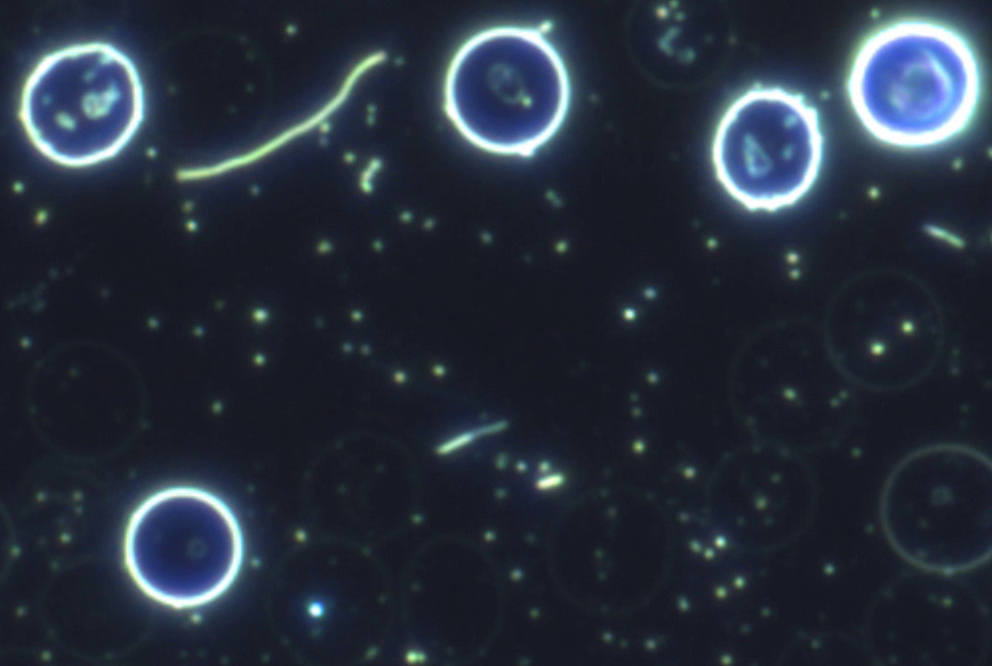

In [21]:
originalImage = cv2.imread('/content/drive/MyDrive/PCVK /Bacteria/026.png')
originalImage = cv2.cvtColor (originalImage, cv2.COLOR_BGR2RGB)
display(Image.fromarray(originalImage))

matplotlib image
Shape: (666, 992, 3)


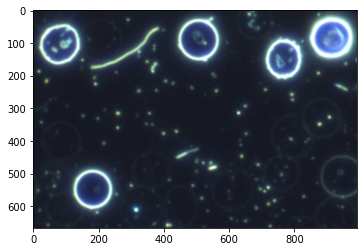

In [36]:
print('matplotlib image')
print("Shape: {}".format(originalImage.shape))
plt.imshow(originalImage)

RGB matplotlib image


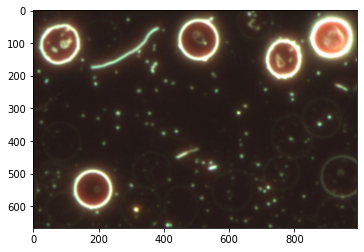

In [37]:
print('RGB matplotlib image')
image = cv2.cvtColor(originalImage, cv2.COLOR_BGR2RGB)
plt.imshow(image)

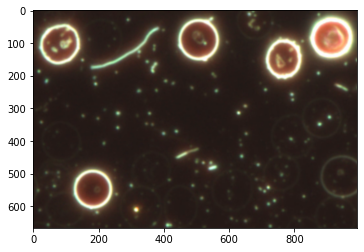

In [65]:
image = cv2.cvtColor(originalImage, cv2.COLOR_BGR2RGB)
blurred = cv2.GaussianBlur(image, (3,3), 7)
plt.imshow(Image.fromarray(blurred))

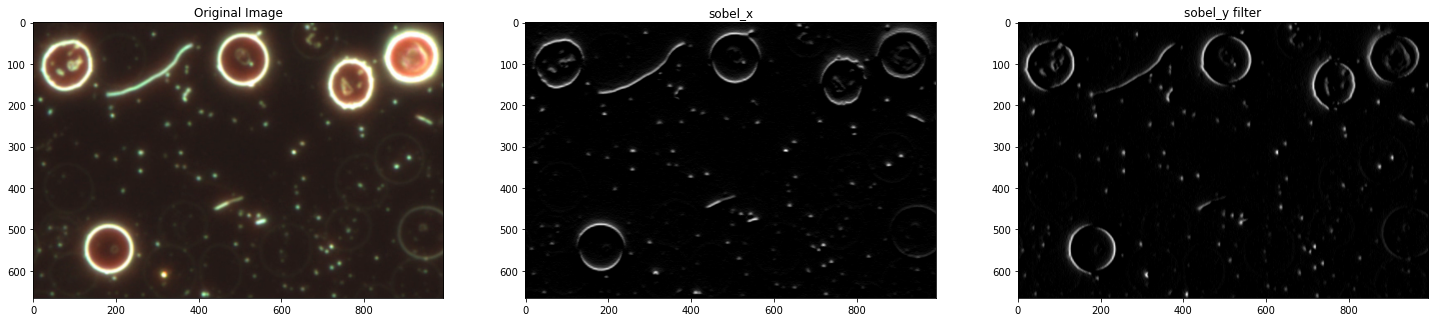

In [78]:
image_original = cv2.imread('/content/drive/MyDrive/PCVK /Bacteria/026.png', cv2.IMREAD_COLOR)
image_gray = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
filtered_image_y = cv2.filter2D(image_gray, -1, sobel_y)
filtered_image_x = cv2.filter2D(image_gray, -1, sobel_x)

(fig, (ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(25, 25))
ax1.title.set_text('Original Image')
ax1.imshow(image_original)
ax2.title.set_text('sobel_x')
ax2.imshow(filtered_image_y, cmap='gray')
ax3.title.set_text('sobel_y filter')
ax3.imshow(filtered_image_x, cmap='gray')

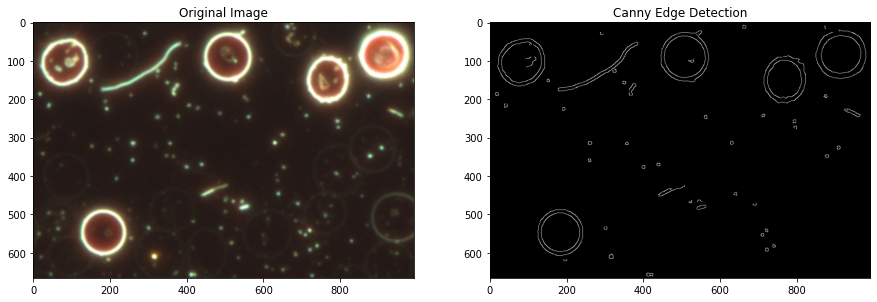

In [80]:
image_original = cv2.imread('/content/drive/MyDrive/PCVK /Bacteria/026.png', cv2.IMREAD_COLOR)

image_gray = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)
filtered_image = cv2.Canny(image_gray, threshold1=20, threshold2=200)

(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 15))
ax1.title.set_text('Original Image')
ax1.imshow(image_original)
ax2.title.set_text('Canny Edge Detection')
ax2.imshow(filtered_image, cmap='gray')

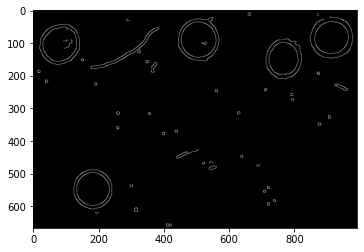

In [98]:
kernel= np.ones((3,3), np.uint8)
img_erosion = cv2.erode(filtered_image, kernel, iterations=1)
img_dilation = cv2.dilate(filtered_image, kernel, iterations=2)
final = plt.imshow(Image.fromarray(img_dilation))
convert = cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB)
plt.imshow(Image.fromarray(convert))

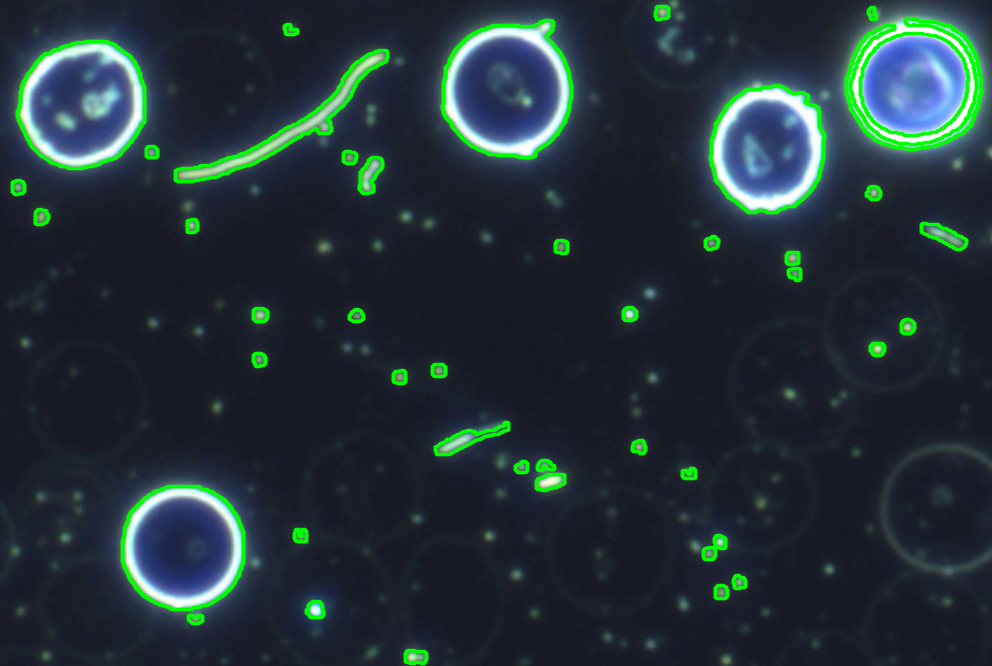

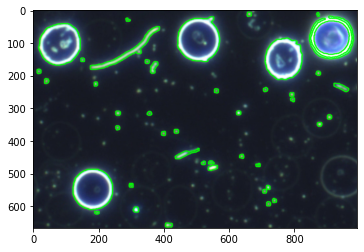

In [104]:
contours, hierarchy = cv2.findContours(img_dilation,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
image_copy = originalImage.copy()
ImageDraw = cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
plt.imshow(Image.fromarray(ImageDraw))
display(Image.fromarray(ImageDraw))
